## Import packages and loan data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
# from pandas.plotting import scatter_matrix
# import matplotlib.colors as mcolors

%matplotlib inline
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20

from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('data/fifa21_raw_data.csv')
df = data.copy()

C:\Users\Carol.Cao\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (76) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# setup display

pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 500)

In [4]:
df.head()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,ID,Height,Weight,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/210005/,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,158023,"5'7""",159lbs,Left,93,RW,0,"Jul 1, 2004",NaN,€67.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-santos-aveiro/210005/,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,20801,"6'2""",183lbs,Right,92,ST,0,"Jul 10, 2018",NaN,€46M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,200389,"6'2""",192lbs,Right,91,GK,2,"Jul 16, 2014",NaN,€75M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyne/210005/,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,192985,"5'11""",154lbs,Right,91,CAM,0,"Aug 30, 2015",NaN,€87M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silva-santos-jr/210005/,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,190871,"5'9""",150lbs,Right,91,LW,0,"Aug 3, 2017",NaN,€90M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,\n273


In [5]:
df.shape

(18979, 77)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   photoUrl          18979 non-null  object
 1   LongName          18979 non-null  object
 2   playerUrl         18979 non-null  object
 3   Nationality       18979 non-null  object
 4   Positions         18979 non-null  object
 5   Name              18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Team & Contract   18979 non-null  object
 10  ID                18979 non-null  int64 
 11  Height            18979 non-null  object
 12  Weight            18979 non-null  object
 13  foot              18979 non-null  object
 14  BOV               18979 non-null  int64 
 15  BP                18979 non-null  object
 16  Growth            18979 non-null  int64 
 17  Joined      

In [7]:
df.columns

Index(['photoUrl', 'LongName', 'playerUrl', 'Nationality', 'Positions', 'Name',
       'Age', '↓OVA', 'POT', 'Team & Contract', 'ID', 'Height', 'Weight',
       'foot', 'BOV', 'BP', 'Growth', 'Joined', 'Loan Date End', 'Value',
       'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'Hits

## Data cleaning and transformation

### Convert Height to numerical forms

In [8]:
df['Height'].unique()

array(['5\'7"', '6\'2"', '5\'11"', '5\'9"', '6\'0"', '5\'10"', '6\'3"',
       '6\'4"', '6\'1"', '6\'6"', '5\'8"', '5\'6"', '6\'5"', '5\'5"',
       '5\'4"', '6\'7"', '5\'2"', '5\'3"', '6\'8"', '5\'1"', '6\'9"'],
      dtype=object)

In [9]:
temp_height = df['Height'].str.split('\'|"', expand=True)[[0, 1]].astype(int)
df['Height(cm)'] = (temp_height[0] * 12 + temp_height[1]) * 2.54
df['Height(cm)'].head()

0    170.18
1    187.96
2    187.96
3    180.34
4    175.26
Name: Height(cm), dtype: float64

### Convert Weight to numerical forms

In [10]:
df['Weight'].unique()

array(['159lbs', '183lbs', '192lbs', '154lbs', '150lbs', '176lbs',
       '161lbs', '201lbs', '157lbs', '152lbs', '203lbs', '187lbs',
       '185lbs', '212lbs', '179lbs', '181lbs', '165lbs', '190lbs',
       '196lbs', '163lbs', '168lbs', '141lbs', '172lbs', '198lbs',
       '146lbs', '132lbs', '207lbs', '174lbs', '148lbs', '143lbs',
       '130lbs', '134lbs', '194lbs', '205lbs', '214lbs', '170lbs',
       '137lbs', '139lbs', '209lbs', '220lbs', '128lbs', '216lbs',
       '227lbs', '218lbs', '123lbs', '225lbs', '223lbs', '126lbs',
       '121lbs', '229lbs', '236lbs', '243lbs', '117lbs', '110lbs',
       '119lbs', '115lbs'], dtype=object)

In [11]:
df['Weight(lbs)'] = df['Weight'].str.rstrip('lbs').astype(int)
df['Weight(lbs)'].head()

0    159
1    183
2    192
3    154
4    150
Name: Weight(lbs), dtype: int32

### Separate Joined into Year, Month and Day

In [12]:
df['Joined'].unique()

array(['Jul 1, 2004', 'Jul 10, 2018', 'Jul 16, 2014', ..., 'Sep 22, 2018',
       'Mar 6, 2018', 'Feb 28, 2015'], dtype=object)

In [13]:
df[['Joined_Month', 'Joined_Day', 'Joined_Year']] = df['Joined'].str.split(' |,', expand=True)[[0, 1, 3]]

df[['Joined_Day', 'Joined_Year']] = df[['Joined_Day', 'Joined_Year']].astype(int)

In [14]:
df['Joined_Month'].unique()

array(['Jul', 'Aug', 'Jan', 'Oct', 'Sep', 'May', 'Jun', 'Feb', 'Apr',
       'Dec', 'Mar', 'Nov'], dtype=object)

In [15]:
df['Joined_Month'] = df['Joined_Month'].replace({'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 
                            'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10,  'Nov':11, 'Dec':12})

In [16]:
df[['Joined_Month', 'Joined_Day', 'Joined_Year']].head()

,Joined_Month,Joined_Day,Joined_Year
0,7,1,2004
1,7,10,2018
2,7,16,2014
3,8,30,2015
4,8,3,2017


### Separate Team & Contract into Team and Contract

In [17]:
df['Team & Contract'].head()

0           \n\n\n\nFC Barcelona\n2004 ~ 2021\n\n
1               \n\n\n\nJuventus\n2018 ~ 2022\n\n
2        \n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n
3        \n\n\n\nManchester City\n2015 ~ 2023\n\n
4    \n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n
Name: Team & Contract, dtype: object

In [18]:
df[['Team', 'Contract']] = df['Team & Contract'].str.split('\n', expand=True)[[4, 5]]

df[['Team', 'Contract']].head()

,Team,Contract
0,FC Barcelona,2004 ~ 2021
1,Juventus,2018 ~ 2022
2,Atlético Madrid,2014 ~ 2023
3,Manchester City,2015 ~ 2023
4,Paris Saint-Germain,2017 ~ 2022


### Convert Value, Wage and Release Clause to numbers

For eg, "M" in value column is Million, so multiply the row values by 1,000,000, etc.

In [19]:
df[['Value', 'Wage', 'Release Clause']].head()

,Value,Wage,Release Clause
0,€67.5M,€560K,€138.4M
1,€46M,€220K,€75.9M
2,€75M,€125K,€159.4M
3,€87M,€370K,€161M
4,€90M,€270K,€166.5M


In [20]:
# define a function to convert string to numerical

def convert_to_numeric(x):
    x = x.lstrip('€')
    if x[-1:] == 'K':
        x = float(x[:-1])*1000
    elif x[-1:] == 'M':
        x = float(x[:-1])*1000000
    else:
        x = float(x)
    return round(x)

In [21]:
# test foe a single value

print(convert_to_numeric(df['Value'].loc[3]))

87000000


In [22]:
# apply the conversion function to the specific columns using apply()

df[['Value(€)', 'Wage(€)', 'Release Clause(€)']] = df[['Value', 'Wage', 'Release Clause']].applymap(convert_to_numeric) 
df[['Value(€)', 'Wage(€)', 'Release Clause(€)']].head()

,Value(€),Wage(€),Release Clause(€)
0,67500000,560000,138400000
1,46000000,220000,75900000
2,75000000,125000,159400000
3,87000000,370000,161000000
4,90000000,270000,166500000


### Strip those columns with 'stars' characters and make the columns numerical

In [23]:
# find columns with 'stars'

filt = df.apply(lambda x: x.str.contains('★', na=False), axis=1)
filt.sum().loc[filt.sum() > 0].index # axis=0 by default

Index(['W/F', 'SM', 'IR'], dtype='object')

In [24]:
df[['W/F', 'SM', 'IR']].head()

,W/F,SM,IR
0,4 ★,4★,5 ★
1,4 ★,5★,5 ★
2,3 ★,1★,3 ★
3,5 ★,4★,4 ★
4,5 ★,5★,5 ★


In [25]:
df[['W/F', 'SM', 'IR']] = df[['W/F', 'SM', 'IR']].apply(lambda x: x.str.rstrip('★').astype(int))
df[['W/F', 'SM', 'IR']].head()

,W/F,SM,IR
0,4,4,5
1,4,5,5
2,3,1,3
3,5,4,4
4,5,5,5


### Remove the newline characters (\n) from all columns that have them

In [26]:
# find columns with '\n'

filt2 = df.apply(lambda x: x.str.contains('\n', na=False), axis=1)
filt2.sum().loc[filt2.sum() > 0].index

Index(['Team & Contract', 'Hits'], dtype='object')

In [27]:
df['Hits'].head()

0    \n372
1    \n344
2     \n86
3    \n163
4    \n273
Name: Hits, dtype: object

In [28]:
df['Hits'] = df['Hits'].astype(str).apply(lambda x: x.replace('\n', ''))

In [29]:
# deal with 'K'

df['Hits'] = df['Hits'].apply(lambda x: float(x[:-1])*1000 if x[-1:] == 'K' else float(x)).astype(int)
df['Hits'].head()

0    372
1    344
2     86
3    163
4    273
Name: Hits, dtype: int32

### Reorder values alphabetically in Position

In [30]:
df['Positions'].head()

0    RW ST CF
1       ST LW
2          GK
3      CAM CM
4      LW CAM
Name: Positions, dtype: object

In [31]:
df['Positions'] = df['Positions'].str.split().apply(sorted).apply(' '.join)

df['Positions'].head()

0    CF RW ST
1       LW ST
2          GK
3      CAM CM
4      CAM LW
Name: Positions, dtype: object

### Select columns/Drop useless columns and insightless features, Rename columns

In [32]:
# df.columns.tolist()

In [33]:
columns_to_drop = ['Team & Contract', 'Height', 'Weight', 'Joined', 'Value', 'Wage', 'Release Clause',
                   'ID', 'photoUrl', 'playerUrl',
                   'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
                   'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
                   'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
                   'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
                   'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
                   'Marking', 'Standing Tackle', 'Sliding Tackle',
                   'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']

cleaned_df = df.drop(columns=columns_to_drop)

In [34]:
cleaned_df.shape

(18979, 43)

## Exploratory Data Analysis (EDA) & Data Visualization

In [35]:
cleaned_df.columns

Index(['LongName', 'Nationality', 'Positions', 'Name', 'Age', '↓OVA', 'POT',
       'foot', 'BOV', 'BP', 'Growth', 'Loan Date End', 'Attacking', 'Skill',
       'Movement', 'Power', 'Mentality', 'Defending', 'Goalkeeping',
       'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC',
       'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits', 'Height(cm)', 'Weight(lbs)',
       'Joined_Month', 'Joined_Day', 'Joined_Year', 'Team', 'Contract',
       'Value(€)', 'Wage(€)', 'Release Clause(€)'],
      dtype='object')

### Age distribution

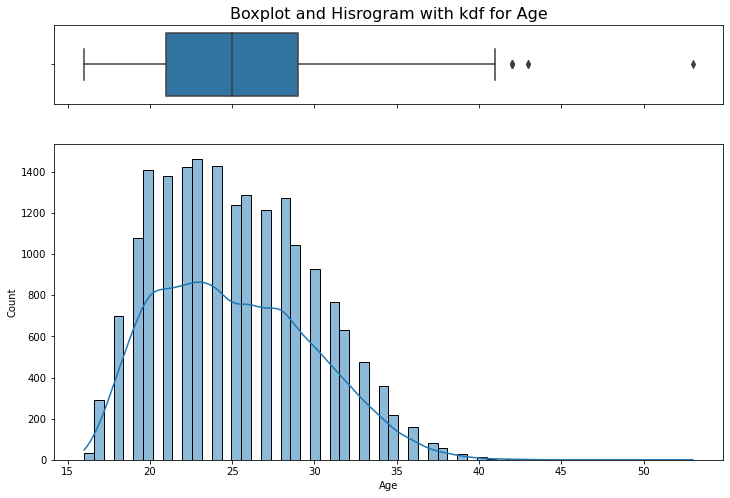

In [36]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.2, .8)}, figsize=(12, 8))

# create a boxplot on the first subplot
sns.boxplot(x=cleaned_df['Age'], ax=ax_box)

# create a histogram on the second subplot
sns.histplot(cleaned_df['Age'], ax=ax_hist, kde=True)

ax_box.set(xlabel='') # Remove x axis name for the boxplot
ax_box.set_title('Boxplot and Hisrogram with kdf for Age', fontsize=16)

plt.show()

In [37]:
# identify outliers for age

def outlier_detection(x):
    sorted(x)
    Q1, Q3 = np.percentile(x, [25, 75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

age_lower_range, age_upper_range = outlier_detection(cleaned_df['Age'])

In [38]:
cleaned_df.loc[cleaned_df['Age'] > age_upper_range]

,LongName,Nationality,Positions,Name,Age,↓OVA,POT,foot,BOV,BP,Growth,Loan Date End,Attacking,Skill,Movement,Power,Mentality,Defending,Goalkeeping,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Height(cm),Weight(lbs),Joined_Month,Joined_Day,Joined_Year,Team,Contract,Value(€),Wage(€),Release Clause(€)
273,Gianluigi Buffon,Italy,GK,G. Buffon,42,82,82,Right,82,GK,0,NaN,95,122,251,243,150,35,396,1292,429,2,1,Medium,Medium,4,77,76,74,78,33,91,79,193.04,203,7,4,2019,Juventus,2019 ~ 2021,2200000,41000,3600000
1098,Vitorino Hilton da Silva,Brazil,CB,Hilton,42,77,77,Right,77,CB,0,NaN,308,310,247,321,340,239,55,1820,367,4,3,Medium,Medium,2,33,51,67,65,81,70,23,180.34,172,8,1,2011,Montpellier HSC,2011 ~ 2021,0,20000,0
4009,Cristian Lucchetti,Argentina,GK,C. Lucchetti,42,71,71,Right,71,GK,0,NaN,111,148,245,225,183,56,356,1324,399,3,1,Medium,Medium,1,72,69,76,70,43,69,6,182.88,163,7,25,2012,Atlético Tucumán,2012 ~ 2021,240000,4000,348000
10107,Shunsuke Nakamura,Japan,CAM CF RW,S. Nakamura,42,65,65,Left,65,CAM,0,NaN,319,379,257,281,284,112,42,1674,327,3,3,High,Low,3,30,69,74,67,36,51,41,177.80,157,7,15,2019,Yokohama FC,2019 ~ 2021,0,1000,0
10933,Hussain Sulaimani,Saudi Arabia,LB,H. Sulaimani,43,64,64,Left,66,CDM,0,NaN,284,333,281,327,349,191,65,1830,364,3,3,High,Medium,1,43,53,68,64,64,72,20,172.72,154,1,14,2019,Al Ahli,2019 ~ 2024,0,5000,0
11451,Leao Butrón,Peru,GK,L. Butrón,43,64,64,Right,64,GK,0,NaN,69,83,182,216,114,60,314,1038,337,3,1,Medium,Medium,1,63,60,61,63,23,67,5,182.88,181,1,1,2015,Alianza Lima,2015 ~ 2020,45000,500,97000
14765,Luis Fernando Fernández,Colombia,GK,L. Fernández,42,61,61,Right,61,GK,0,NaN,79,86,190,218,130,36,301,1040,333,2,1,Medium,Medium,1,60,62,61,63,32,55,4,187.96,181,1,29,2018,SD Aucas,2018 ~ 2024,25000,500,54000
16121,Kazuyoshi Miura,Japan,ST,K. Miura,53,59,59,Right,60,CF,0,NaN,289,290,187,235,257,42,41,1341,269,4,2,Low,Low,1,25,63,55,60,19,47,96,177.80,159,7,1,2005,Yokohama FC,2005 ~ 2021,0,850,0


There are 8 players with age greater than or equal to 42. By observing Overall and Potential columns, we can say that an increase in age has a detrimental effect on these scores.

### Height and Weight distribution

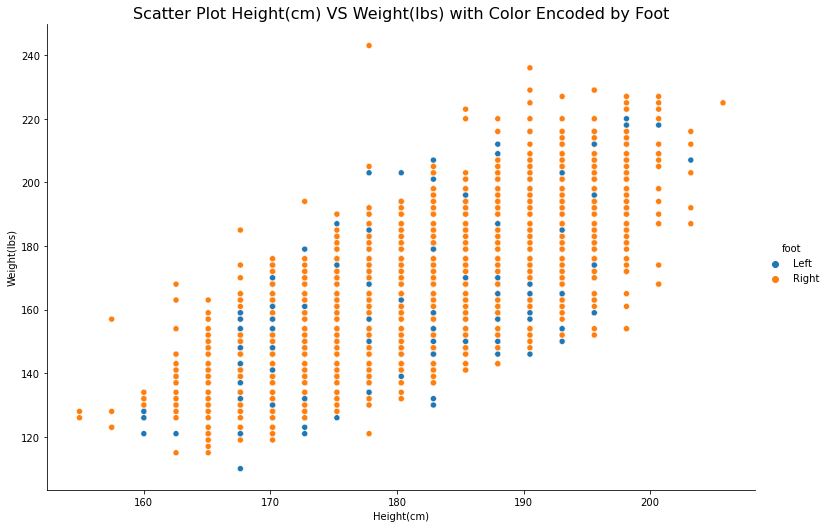

In [39]:
sns.relplot(data=cleaned_df, x='Height(cm)', y='Weight(lbs)', hue='foot', kind='scatter', height=7, aspect=1.5)
plt.title('Scatter Plot Height(cm) VS Weight(lbs) with Color Encoded by Foot', fontsize=16)
plt.show()

In [40]:
cleaned_df['foot'].value_counts(dropna=False)

Right    14445
Left      4534
Name: foot, dtype: int64

From the scatter plot and summarized data we can conclude that most players are right-footed, and measures height and weight are positively correlated.

### Check which players have been playing at a club for more than 10 years

In [41]:
filt = cleaned_df['Joined_Year'] < 2013
cleaned_df.loc[filt].sort_values(by='Joined_Year')[['LongName', 'Nationality', 'Team', 'Joined_Year']].head()

,LongName,Nationality,Team,Joined_Year
10282,Hitoshi Sogahata,Japan,Kashima Antlers,1998
501,Igor Akinfeev,Russia,PFC CSKA Moscow,2002
9955,Dean Lewington,England,Milton Keynes Dons,2002
4785,Kwang Suk Kim,Korea Republic,Pohang Steelers,2002
15538,Mark McNulty,Republic of Ireland,Cork City,2003


In [42]:
cleaned_df.loc[filt].sort_values(by='Joined_Year')[['LongName', 'Nationality', 'Team', 'Joined_Year']].shape[0]

466

466 of 18979 (2.45%) players have been playing at a club for more than 10 years

### Medium Overall and Potential for top 10 Teams

In [43]:
grps = cleaned_df.groupby(['Team'])

In [44]:
# check group 'Manchester United' ordered by 'Joined_Year'

grps.get_group('Manchester United').sort_values(by='Joined_Year')[['LongName', 'Nationality', 'Team', 'Joined_Year',
                                                                   'Age', 'Height(cm)', 'Weight(lbs)', '↓OVA', 'POT',
                                                                   'Value(€)', 'Wage(€)', 'Positions']]

,LongName,Nationality,Team,Joined_Year,Age,Height(cm),Weight(lbs),↓OVA,POT,Value(€),Wage(€),Positions
1043,Jesse Lingard,England,Manchester United,2011,27,175.26,137,77,77,9500000,93000,CAM RM
1795,Phil Jones,England,Manchester United,2011,28,185.42,157,75,75,6000000,79000,CB
53,David De Gea Quintana,Spain,Manchester United,2011,29,193.04,181,86,86,31500000,150000,GK
2641,Axel Tuanzebe,England,Manchester United,2013,22,185.42,165,73,81,5500000,55000,CB
523,Scott McTominay,Scotland,Manchester United,2013,23,193.04,194,79,84,15500000,85000,CDM CM
66,Marcus Rashford,England,Manchester United,2014,22,185.42,154,85,91,53000000,150000,LM ST
668,Juan Manuel Mata García,Spain,Manchester United,2014,32,170.18,139,79,79,10000000,110000,CAM RM
320,Luke Shaw,England,Manchester United,2014,24,180.34,165,81,83,19000000,97000,LB
1782,Marcos Rojo,Argentina,Manchester United,2014,30,187.96,187,75,75,5500000,75000,CB
111,Anthony Martial,France,Manchester United,2015,24,182.88,168,84,88,41000000,155000,ST


In [45]:
teams_list = ['Manchester United', 'Real Madrid', 'Juventus', 'Chelsea', 'Arsenal', 'Paris Saint-Germain',
              'Manchester City', 'FC Barcelona', 'Liverpool', 'FC Bayern München']

grps[['↓OVA', 'POT']].median().loc[teams_list].sort_values(by=['↓OVA', 'POT'], ascending=False)

,↓OVA,POT
Team,,
FC Bayern München,82.0,85.0
Real Madrid,81.0,86.5
Juventus,80.5,83.5
Manchester City,80.0,84.0
Liverpool,80.0,84.0
Chelsea,79.0,84.0
Manchester United,79.0,83.0
Paris Saint-Germain,79.0,82.0
FC Barcelona,76.0,85.0


The team FC Bayern München has the highest median Overall and Potential scores in the top 10 populars.

### Select top 20 players with highest Overall, Value and Wage in order

In [46]:
cleaned_df.nlargest(20, ['↓OVA', 'Value(€)', 'Wage(€)'])[['LongName', 'Nationality', 'Team', 
                                                          '↓OVA', 'Value(€)', 'Wage(€)']]

,LongName,Nationality,Team,↓OVA,Value(€),Wage(€)
0,Lionel Messi,Argentina,FC Barcelona,93,67500000,560000
1,C. Ronaldo dos Santos Aveiro,Portugal,Juventus,92,46000000,220000
4,Neymar da Silva Santos Jr.,Brazil,Paris Saint-Germain,91,90000000,270000
3,Kevin De Bruyne,Belgium,Manchester City,91,87000000,370000
5,Robert Lewandowski,Poland,FC Bayern München,91,80000000,240000
2,Jan Oblak,Slovenia,Atlético Madrid,91,75000000,125000
6,Kylian Mbappé,France,Paris Saint-Germain,90,105500000,160000
8,Mohamed Salah,Egypt,Liverpool,90,78000000,250000
9,Sadio Mané,Senegal,Liverpool,90,78000000,250000
10,Virgil van Dijk,Netherlands,Liverpool,90,75500000,210000


### Identify which players are highly valuable but underpaid

In [47]:
# fit a linear regression model for Value vs. Wage
regression_model = LinearRegression().fit(cleaned_df[['Value(€)']], cleaned_df['Wage(€)'])

# predict wages using the regression model
predicted_wage = regression_model.predict(cleaned_df[['Value(€)']])

# create a new DataFrame with the original data and predicted Y values
df_with_predictions = cleaned_df.copy()
df_with_predictions['Predicted_Wage(€)'] = predicted_wage

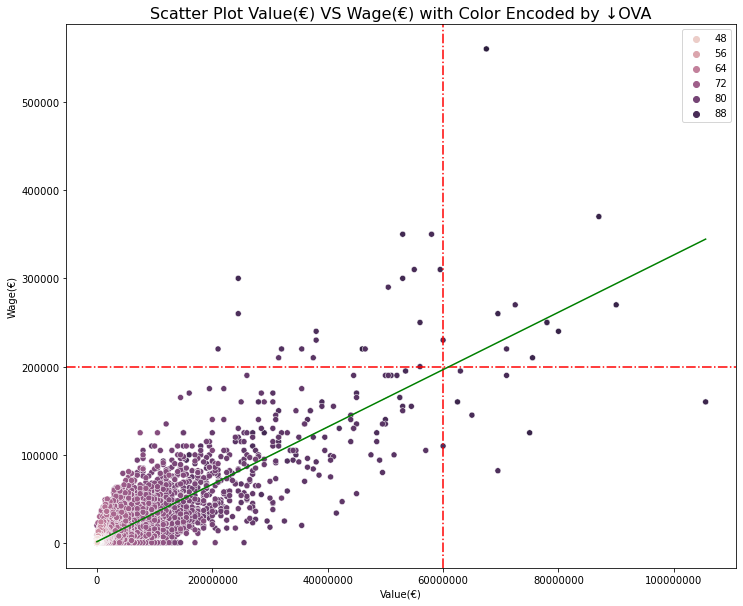

In [48]:
plt.figure(figsize=(12, 10)) # set up figure size
plt.ticklabel_format(style='plain') # disable scientific notation for axis tick labels in general

b = sns.scatterplot(data=cleaned_df, x='Value(€)', y='Wage(€)', hue='↓OVA')
b.axes.set_title('Scatter Plot Value(€) VS Wage(€) with Color Encoded by ↓OVA', fontsize=16)

plt.axvline(x=60000000, color='r', linestyle='-.')
plt.axhline(y=200000, color='r', linestyle='-.')
sns.lineplot(data=df_with_predictions, x=df_with_predictions['Value(€)'], y=df_with_predictions['Predicted_Wage(€)'], color='g')

plt.show()

In [49]:
# find rows where the actual wage is below the predicted_wage value
filt = (df_with_predictions['Wage(€)'] < df_with_predictions['Predicted_Wage(€)']) & (df_with_predictions['Value(€)'] > 60000000)
rows_below_regression_line = df_with_predictions.loc[filt][['LongName', 'Nationality', 'Team', 'Age', 
                                                            '↓OVA', 'POT', 'Value(€)', 'Wage(€)']]
rows_below_regression_line

,LongName,Nationality,Team,Age,↓OVA,POT,Value(€),Wage(€)
2,Jan Oblak,Slovenia,Atlético Madrid,27,91,93,75000000,125000
4,Neymar da Silva Santos Jr.,Brazil,Paris Saint-Germain,28,91,91,90000000,270000
5,Robert Lewandowski,Poland,FC Bayern München,31,91,91,80000000,240000
6,Kylian Mbappé,France,Paris Saint-Germain,21,90,95,105500000,160000
7,Alisson Ramses Becker,Brazil,Liverpool,27,90,91,62500000,160000
8,Mohamed Salah,Egypt,Liverpool,28,90,90,78000000,250000
9,Sadio Mané,Senegal,Liverpool,28,90,90,78000000,250000
10,Virgil van Dijk,Netherlands,Liverpool,28,90,91,75500000,210000
19,Joshua Kimmich,Germany,FC Bayern München,25,88,90,65000000,145000
20,Paulo Dybala,Argentina,Juventus,26,88,89,71000000,190000


From the above data we can conclude that those who are highly valuable but underpaid have higher Potential score and young age in general.

### Relationship of Wage and Reputation

Text(0.5, 1.0, 'Wage(€) Distribution by International Reputation ')

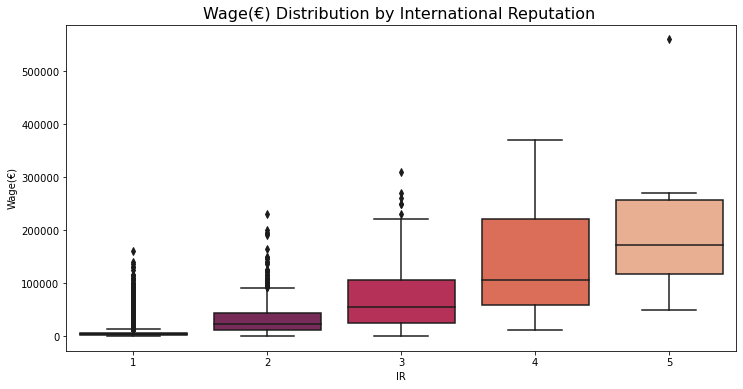

In [50]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_df, x='IR', y='Wage(€)', palette='rocket')
plt.title('Wage(€) Distribution by International Reputation ', fontsize=16)

From the above box plots we can find that the players with higher international reputation scores usually have higher median weekly wage.

### Best Position distribution

In [51]:
bp_counts = cleaned_df['BP'].value_counts() # use value_counts() to get the counts of unique values
bp_counts = pd.DataFrame({'BP': bp_counts.index, 'Counts': bp_counts.values}) # convert the result to a DataFrame

Text(0.5, 1.0, 'Best Position Counts')

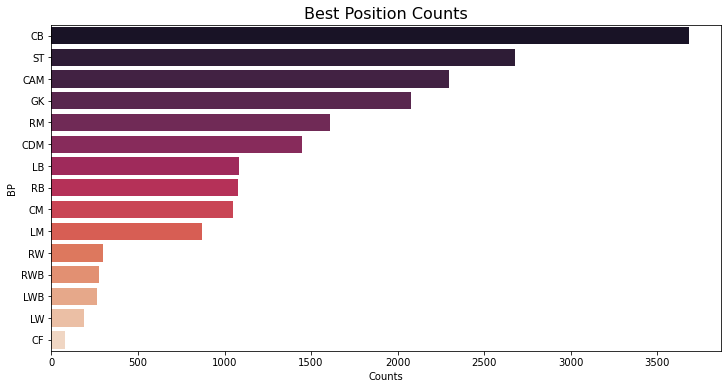

In [52]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Counts', y='BP', palette='rocket', data=bp_counts)
plt.title('Best Position Counts', fontsize=16)

From the above bar chart, we can see that the most 3 frequent best positions are CB (Centre Back), ST (Striker) and CAM (Central Attacking Midfielder).

### Identify which game attributes are valuable for different Positions

In [53]:
positions = cleaned_df['BP'].unique()
attributes = ['Attacking', 'Skill', 'Movement', 'Power', 'Mentality', 'Defending', 'Goalkeeping', 
              'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']

In [54]:
attr_pos = cleaned_df.groupby('BP')[attributes].mean()
attr_pos = attr_pos.apply(lambda x: x/x.max()*100) # normalize data
attr_pos.reset_index(inplace=True) # convert index to a column
attributes = np.array(attributes) # convert list to np.array

In [55]:
attr_pos

,BP,Attacking,Skill,Movement,Power,Mentality,Defending,Goalkeeping,PAC,SHO,PAS,DRI,DEF,PHY
0,CAM,86.964630,94.745984,92.362625,89.639001,89.029931,65.748448,16.115068,88.101484,84.348609,95.650377,92.919504,66.647989,80.210594
1,CB,70.235087,67.941369,76.269536,88.031406,81.438276,100.000000,16.385400,73.894900,52.151891,73.847446,69.245188,100.000000,100.000000
2,CDM,82.447090,88.003066,84.788334,96.634588,97.013132,99.077704,16.471867,77.937698,72.906248,93.489070,85.986117,98.692235,99.098902
3,CF,100.000000,100.000000,97.378139,100.000000,96.453000,48.909836,16.531034,92.198009,100.000000,97.641747,100.000000,55.042786,87.376653
4,CM,88.895168,95.943555,87.229260,97.553535,100.000000,91.800872,16.442936,79.630527,82.874250,100.000000,91.045733,92.347576,93.760725
5,GK,23.735510,26.299897,57.128427,61.290596,35.407921,21.202124,100.000000,82.593107,89.072516,93.326601,89.892869,56.955224,89.519016
6,LB,78.955755,83.127738,91.085344,88.999884,89.000549,96.864231,16.468439,90.968267,63.023819,86.791606,85.117313,95.361367,92.009752
7,LM,87.905849,92.050004,96.276517,90.991844,86.821114,62.040159,16.325275,96.687680,84.073825,93.393462,92.719235,63.397534,82.643197
8,LW,91.777685,94.105020,99.718291,91.582964,86.843694,50.154277,16.510450,99.439368,90.657334,93.727855,97.416209,53.120038,80.035655
9,LWB,80.331521,86.347306,93.998029,91.181495,89.709812,95.613652,16.110277,94.358729,66.666667,89.804216,88.479128,93.816962,92.675485


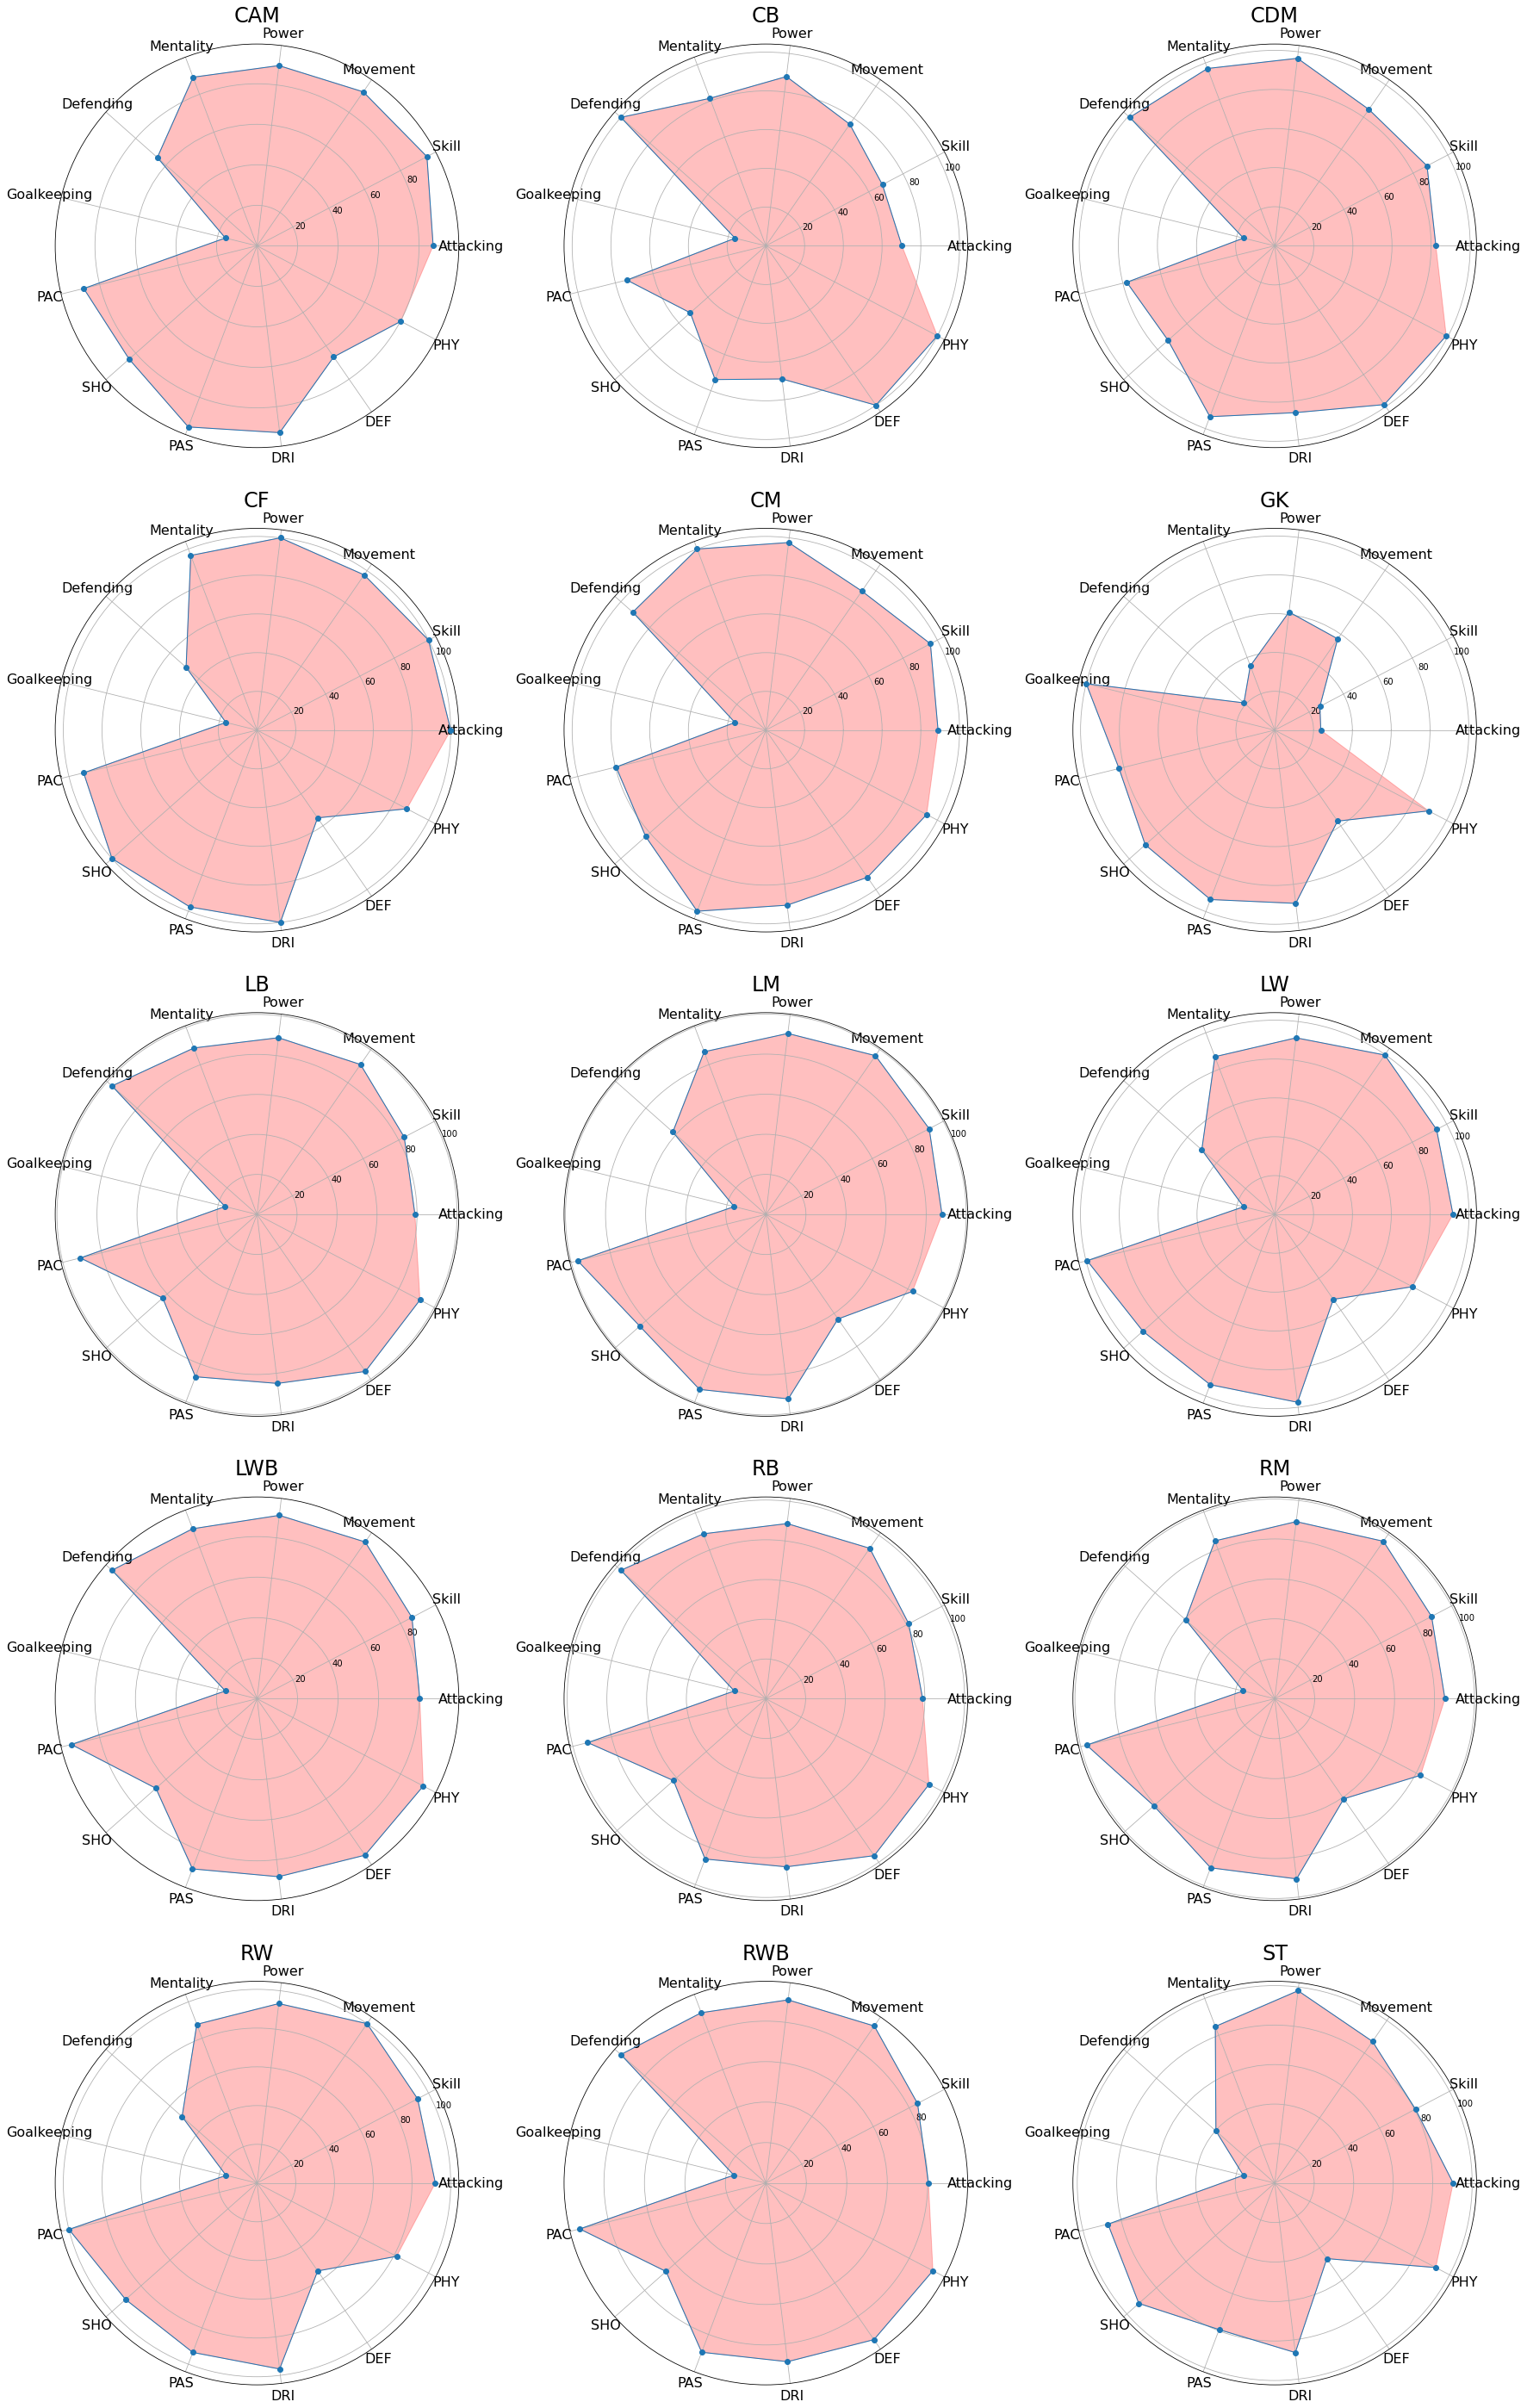

In [56]:
fig = plt.figure(figsize=(30, 50))

for i in range(0, len(positions)):
    stats = attr_pos.loc[i, attributes].values
    angles = np.linspace(0, 2*np.pi, len(attributes), endpoint=False)

    ax = fig.add_subplot(5, 3, i+1, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=1)
    ax.fill(angles, stats, color='red', alpha=0.25)
    ax.set_thetagrids(angles*180/np.pi, attributes, fontsize=16)
    ax.set_title(attr_pos.loc[i, 'BP'], fontsize=24)
    ax.grid(True)

There are 15 different positions and 13 attributes in football games. We can classify the position as three groups according to the shape of the red shades. The first group conclude 7 positions (CAM, CF, LM, LW, RM, RW, and ST), and these positions usually have low defending and high PAC (sprint speed and acceleration). The second group has 6 positions (CB, CDM, CM, LB, LWB, RB, and RWB), and attributes like Shooting and Attacking and are not as important as other features like Defending and PAC. The last group is for GK (Goalkeeper), as well known, Goalkeepers play a different but also crucial role in football games.

### Players with most Hits (over 1000)

In [57]:
filt = cleaned_df['Hits'] >= 1000
cleaned_df.loc[filt, ['LongName', 'Nationality', 'Team', 
                      'Age', 'Height(cm)', 'Weight(lbs)', 
                      '↓OVA', 'POT', 'BP', 'Value(€)', 'Wage(€)', 'Hits']].sort_values(by='Hits', ascending=False)

,LongName,Nationality,Team,Age,Height(cm),Weight(lbs),↓OVA,POT,BP,Value(€),Wage(€),Hits
4064,Reinier Jesus Carvalho,Brazil,Borussia Dortmund,18,185.42,159,71,87,CAM,4900000,13000,4500
279,Marc Cucurella Saseta,Spain,Getafe CF,21,172.72,146,81,89,LM,26500000,28000,2900
688,Bruno Guimarães Moura,Brazil,Olympique Lyonnais,22,182.88,172,78,87,CM,15500000,52000,2000
4680,Giovanni Reyna,United States,Borussia Dortmund,17,185.42,174,70,87,CAM,3500000,3000,1900
9707,Enzo Loiodice,France,UD Las Palmas,19,175.26,132,65,80,CM,1100000,2000,1900
6203,Jude Bellingham,England,Borussia Dortmund,17,185.42,165,69,88,CAM,2100000,3000,1800
1399,Eduardo Camavinga,France,Stade Rennais FC,17,182.88,150,76,88,CM,12000000,5000,1700
245,Harry Maguire,England,Manchester United,27,193.04,220,82,85,CB,24000000,120000,1500
99,Erling Haaland,Norway,Borussia Dortmund,19,193.04,194,84,92,ST,45000000,56000,1300
4045,Noni Madueke,England,PSV,18,175.26,143,71,87,CAM,4900000,4000,1300


15 palyers have page views over a thousand, we can also see that these palyers are young with high potential.